In [1]:
import mxnet as mx
from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
mx.random.seed(42)
X = mx.random.uniform(shape=(10, 3))
y = mx.random.uniform(shape=(10, 1))
dataset = gluon.data.dataset.ArrayDataset(X, y)

In [4]:
# DataLoader
data_loader = gluon.data.DataLoader(dataset, batch_size=5, last_batch='keep')

for X_batch, y_batch in data_loader:
    print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)


In [5]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

data_loader = gluon.data.DataLoader(dataset, batch_size=5, num_workers=CPU_COUNT)

for X_batch, y_batch in data_loader:
    print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)


In [6]:
from mxnet.gluon.data.vision import transforms

train_dataset = gluon.data.vision.datasets.MNIST(train=True)
transform = transforms.Compose([transforms.RandomFlipTopBottom(),
                               transforms.RandomFlipLeftRight()])

In [7]:
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform), batch_size=5, shuffle=True)

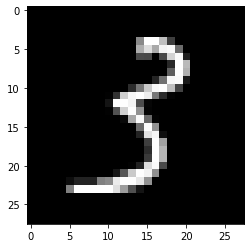

In [8]:
for X_batch, y_batch in train_dataloader:
    imshow(X_batch[3,:,:,0].asnumpy(), cmap='gray')
    break